<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/Notes/TensorFlow_2_quickstart_for_experts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load mnist data

In [54]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## Visualize the data


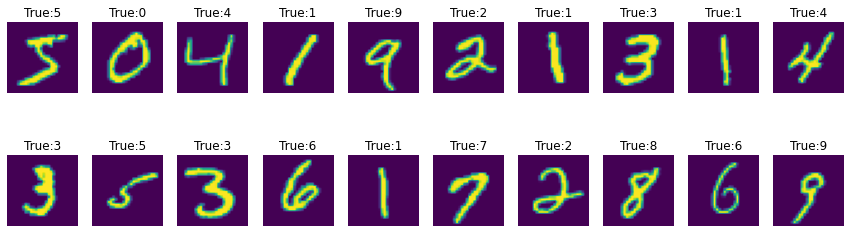

In [55]:
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(X_train[i])
  plt.axis(False)
  plt.subplots_adjust(top=0.35)
  plt.title('True:'+str(y_train[i]))


## Prepare the data

In [56]:
# check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [57]:
# check the max and min 
X_train[0].max() , X_train[0].min()

(255, 0)

In [58]:
# Normalize the pixel values 
X_train = X_train/255.0
X_test = X_test/255.0

X_train[0].max() , X_train[0].min()

(1.0, 0.0)

In [59]:
# Add a channels dimension

X_train = X_train[..., tf.newaxis].astype('float32')
X_test = X_test[..., tf.newaxis].astype('float32')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

## Batch and Shuffle
Use tf.data to batch and shuffle the dataset:

>**`batch(
    batch_size, drop_remainder=False, num_parallel_calls=None, deterministic=None
)`**

The components of the resulting element will have an additional outer dimension, which will be batch_size (or N % batch_size for the last element if batch_size does not divide the number of input elements N evenly and drop_remainder is False). If your program depends on the batches having the same outer dimension, you should set the drop_remainder argument to True to prevent the smaller batch from being produced.

>**`shuffle(
    buffer_size, seed=None, reshuffle_each_iteration=None
)`**

Randomly shuffles the elements of this dataset.

This dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements. For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required.

For instance, if your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer. Once an element is selected, its space in the buffer is replaced by the next (i.e. 1,001-st) element, maintaining the 1,000 element buffer.

reshuffle_each_iteration controls whether the shuffle order should be different for each epoch. 

`dataset = tf.data.Dataset.range(3)`

`dataset = dataset.shuffle(3, reshuffle_each_iteration=True)`

`dataset = dataset.repeat(2)`
# [1, 0, 2, 1, 2, 0]

`dataset = tf.data.Dataset.range(3)`

`dataset = dataset.shuffle(3, reshuffle_each_iteration=False)`

`dataset = dataset.repeat(2)`
# [1, 0, 2, 1, 0, 2]

In TF 2.0, tf.data.Dataset objects are Python iterables which makes it possible to also create epochs through Python iteration:

`dataset = tf.data.Dataset.range(3)`

`dataset = dataset.shuffle(3, reshuffle_each_iteration=True)`

`list(dataset.as_numpy_iterator())`
# [1, 0, 2]
`list(dataset.as_numpy_iterator())`
# [1, 2, 0]

`dataset = tf.data.Dataset.range(3)`

`dataset = dataset.shuffle(3, reshuffle_each_iteration=False)`

`list(dataset.as_numpy_iterator())`
# [1, 0, 2]
`list(dataset.as_numpy_iterator())`
# [1, 0, 2]


>**`as_numpy_iterator()`**

Returns an iterator which converts all elements of the dataset to numpy.

Use as_numpy_iterator to inspect the content of your dataset. To see element shapes and types, print dataset elements directly instead of using as_numpy_iterator.



`

In [60]:
# Batch and shuffle

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=10000, reshuffle_each_iteration=True).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

## Creating a Model
Build the tf.keras model using the Keras model subclassing API:

### tf.keras.Model
Model groups layers into an object with training and inference features.

Inherits From: Layer, Module

`tf.keras.Model(
    *args, **kwargs
)`

There are two ways to instantiate a Model:

1 - With the "Functional API", where you start from Input, you chain layer calls to specify the model's forward pass, and finally you create your model from inputs and outputs:

eg :

`input = tf.keras.Input(shape=(3,))`

`dense = tf.keras.Layers.Dense(10)(input)`

`output = tf.keras.Layers.Dense(1)(dense)`

`model = tf.keras.Model(inputs=input, outputs=output)`

2 - By subclassing the Model class: in that case, you should define your layers in __init__ and you should implement the model's forward pass in call.

`class MyModel(tf.keras.Model):`

  `def __init__(self):`

    `super(MyModel, self).__init__()`

    `self.dense1 =  tf.keras.layers.Dense(4, activation=tf.nn.relu)`

    `self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)`

  `def call(self, input):`

    `x self.dense1(input)`

    `return self.dense2(dense1)`


`model - MyModel()`


If you subclass Model, you can optionally have a training argument (boolean) in call, which you can use to specify a different behavior in training and inference:

`class MyModel(tf.keras.Model):`

  `def __init__(self):`

    `super(MyModel, self).__init__()`
    `self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)`
    `self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)`
    `self.dropout = tf.keras.layers.Dropout(0.5)`

  `def call(self, inputs, training=False):`

    `x = self.dense1(inputs)`
    `if training:`
      `x = self.dropout(x, training=training)`
    `return self.dense2(x)`

Once the model is created, you can config the model with losses and metrics with model.compile(), train the model with model.fit(), or use the model to do prediction with model.predict().


In [61]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.convolutionLayer =  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform')
    self.flattenLayer = tf.keras.layers.Flatten()
    self.hiddenLayer = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')
    self.outputLayer = tf.keras.layers.Dense(10)

  def call(self, input):
    convolution = self.convolutionLayer(input)
    flattenLayer = self.flattenLayer(convolution)
    hiddenLayer = self.hiddenLayer(flattenLayer)
    outputLayer = self.outputLayer(hiddenLayer)
    return outputLayer

model = MyModel()



## Choose an optimizer and loss function for training:

In [62]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.

In [63]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

# Training 

Use tf.GradientTape to train the model:

Record operations for automatic differentiation.

`tf.GradientTape(
    persistent=False, watch_accessed_variables=True
)`

Automatic differentiation is useful for implementing machine learning algorithms such as backpropagation for training neural networks.

**Computing gradients**:
To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.

**computing the gradient of a computation with respect to some inputs**, usually tf.Variables. TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

eg:

`x = tf.Variable(3.0)`

`with tf.GradientTape() as tape:`

   >`y = x**2`


dy_dx = tape.gradient(y, x)

dy_dx.numpy()

output = 6.0

Operations are recorded if they are executed within this context manager and at least one of their inputs is being "watched".

**Trainable variables (created by tf.Variable or tf.compat.v1.get_variable, where trainable=True is default in both cases) are automatically watched. Tensors can be manually watched by invoking the watch method on this context manager.**

For example, consider the function y = x * x. The gradient at x = 3.0 can be computed as:

`x = tf.constant(3.0)`

`with tf.GradientTape() as g:`

  >`g.watch(x)`

  >`y = x * x`

`dy_dx = g.gradient(y, x)`

`print(dy_dx)` give us the output

**to disable the default behavior of watching all tf.Variables, set watch_accessed_variables=False when creating the gradient tape.**

By default, the resources held by a GradientTape are released as soon as GradientTape.gradient() method is called. To compute multiple gradients over the same computation, create a persistent gradient tape. This allows multiple calls to the gradient() method as resources are released when the tape object is garbage collected. For example:

`x = tf.constant(3.0)`

`with tf.GradientTape(persistent=True) as g:`

>  `g.watch(x)`

>  `y = x * x`

>  `z = y * y`

`dz_dx = g.gradient(z, x)  # (4*x^3 at x = 3)`

`print(dz_dx)`

`dy_dx = g.gradient(y, x)`

`print(dy_dx)`



In [64]:
# training using gradient descent
@tf.function
def training_step(images, labels):

  with tf.GradientTape() as tape:
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
    
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))

  # metrics
  train_loss(loss)
  train_accuracy(labels, predictions)


In [65]:
@tf.function
def testing_step(images, labels):
  predictions = model(images, training=False)
  loss = loss_object(labels, predictions)

  test_loss(loss)
  test_accuracy(labels, predictions)


In [66]:


epochs = 5

for epoch in range(epochs):
  # reset the metrics at the begining of every epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    training_step(images, labels)

  for images, labels in train_ds:
    testing_step(images, labels)

  print('Epoch:',epoch+1)
  print('Training loss',train_loss.result())
  print('Training accuracy', train_accuracy.result()*100)
  print('Training loss',test_loss.result())
  print('Training accuracy', test_accuracy.result()*100)


Epoch: 1
Training loss tf.Tensor(0.1370306, shape=(), dtype=float32)
Training accuracy tf.Tensor(95.93833, shape=(), dtype=float32)
Training loss tf.Tensor(0.046320945, shape=(), dtype=float32)
Training accuracy tf.Tensor(98.57166, shape=(), dtype=float32)
Epoch: 2
Training loss tf.Tensor(0.038649954, shape=(), dtype=float32)
Training accuracy tf.Tensor(98.755005, shape=(), dtype=float32)
Training loss tf.Tensor(0.021312311, shape=(), dtype=float32)
Training accuracy tf.Tensor(99.39333, shape=(), dtype=float32)
Epoch: 3
Training loss tf.Tensor(0.020180574, shape=(), dtype=float32)
Training accuracy tf.Tensor(99.31333, shape=(), dtype=float32)
Training loss tf.Tensor(0.013361711, shape=(), dtype=float32)
Training accuracy tf.Tensor(99.60833, shape=(), dtype=float32)
Epoch: 4
Training loss tf.Tensor(0.01277736, shape=(), dtype=float32)
Training accuracy tf.Tensor(99.566666, shape=(), dtype=float32)
Training loss tf.Tensor(0.009573323, shape=(), dtype=float32)
Training accuracy tf.Tensor(

# Visualize Model predictions

In [67]:
# predictions
model_predictions = model.predict(X_test)

In [86]:
# convert output logits to probability

probablility = tf.nn.softmax(model_predictions)


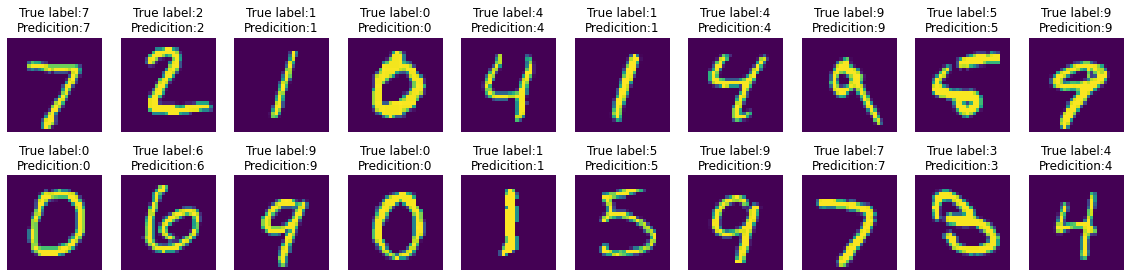

In [100]:
# visualize first 20 test images , true labels and model_predictions
num=20
plt.figure(figsize=(20,20))
for i in range(num):
  plt.subplot(2,10,i+1)
  plt.subplots_adjust(top=0.3, wspace=0.2)
  plt.imshow(X_test[i].reshape(28,28))
  plt.axis(False)
  plt.title('True label:'+str(y_test[i])+'\nPredicition:'+str(np.argmax(probablility[i])))
plt.show()

In [96]:
X_test.shape

(10000, 28, 28, 1)